In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit.result import marginal_counts
import numpy
import matplotlib.pyplot as plot

In [3]:
# Define constants & parameters
pi = numpy.pi
phi_R = Parameter('phi_R') 
phi_S = Parameter('phi_S')

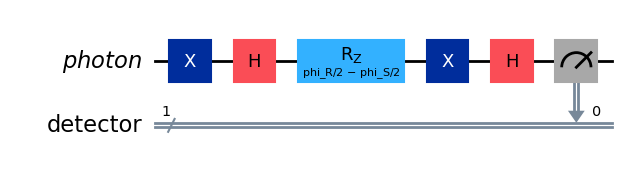

In [4]:
# Create a quantum register named "photon" and a classical bit
qr_photon = QuantumRegister(1, 'photon')
cr = ClassicalRegister(1, 'detector')

# Create a circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(qr_photon, cr)

# 1st BS; creates a superposition and a phase shift by π
qc.x(0)
qc.h(0)

# Phase shift by total of 2π due to the mirrors
# qc.p(pi*2,0)

# Phase shifts by (φ_S - φ_R) due to the lengths
qc.rz((phi_R-phi_S)/2,0)

# 2nd BS and a phase shift by π
qc.x(0)
qc.h(0)

# Measurement on qubit 0 (photon)
qc.measure(0,0)

# Draw the circuit
qc.draw('mpl')

In [5]:
# Define backend
backend = AerSimulator()

# ASSIGN PARAMS HERE
param_values = {phi_S: pi, phi_R: 0}
bound_qc = qc.assign_parameters(param_values)

# Transpile the circuit
qc_trans = transpile(bound_qc, backend)
print(qc_trans)

# Run for 2^13 shots
job = backend.run(qc_trans, shots=8192, memory=True)

# Display results
result = job.result()
count_result = marginal_counts(result.get_counts(qc_trans))
print(count_result)

global phase: π/2
            ┌─────────────┐┌─┐
    photon: ┤ U2(π/2,π/2) ├┤M├
            └─────────────┘└╥┘
detector: 1/════════════════╩═
                            0 
{'1': 4114, '0': 4078}
